In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)

In [9]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

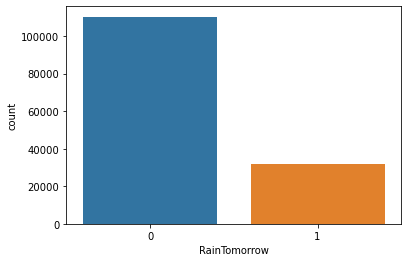

In [11]:
sns.countplot(df['RainTomorrow'])

In [12]:
df.groupby(by=['RainTomorrow'])['RainTomorrow'].count()

RainTomorrow
0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [13]:
31877/110316

0.288960803509917

In [14]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

In [15]:
oversampled.shape

(220632, 24)

In [16]:
oversampled.groupby(by=['RainTomorrow'])['RainTomorrow'].count()

RainTomorrow
0    110316
1    110316
Name: RainTomorrow, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

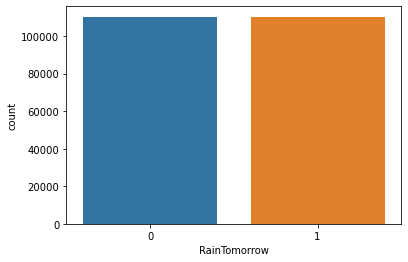

In [17]:
sns.countplot(oversampled['RainTomorrow'])

<AxesSubplot:>

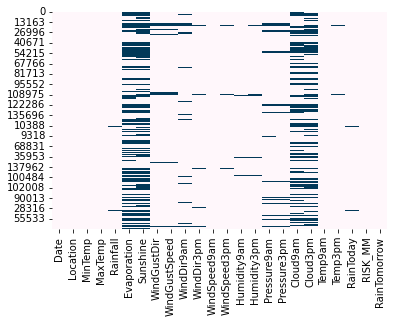

In [18]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [19]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562
Pressure9am,21728,0.098481
WindGustDir,15491,0.070212
WindGustSpeed,15354,0.069591
WindDir9am,14728,0.066754
WindDir3pm,6440,0.029189


In [20]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
# Impute categorical var with Mode
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [22]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in oversampled.select_dtypes(include=['object']).columns:
    l = LabelEncoder()
    oversampled[col] = l.fit_transform(oversampled[col])

In [23]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,950,17,1.1,11.8,0.4,NaN,NaN,14,13.0,3,...,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,8.8,1
114384,3114,29,9.6,14.8,11.8,NaN,4.3,13,69.0,14,...,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,5.4,1
84962,503,8,24.8,31.5,0.0,5.4,3.4,9,48.0,10,...,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,9.8,1
54992,1721,5,4.2,7.9,11.4,NaN,NaN,12,63.0,6,...,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,18.4,1


In [24]:
oversampled.WindDir9am.unique()

array([13,  6,  9,  1, 12, 10,  8,  3, 15,  4,  2,  0, 14,  5,  7, 11])

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
mice_imputer=IterativeImputer()

In [27]:
data=mice_imputer.fit_transform(oversampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [28]:
raindata=pd.DataFrame(data,columns=oversampled.columns)
raindata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.735438,7.364116,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.868720,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639582,11.470601,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.734671,2.639541,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.762987,12.281872,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.820254,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.977338,11.743982,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.236006,2.133027,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.852950,5.756442,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220627,950.0,17.0,1.1,11.8,0.4,-1.695532,0.725087,14.0,13.0,3.0,...,98.0,1020.1,1013.3,6.438835,7.620772,4.0,9.5,0.0,8.8,1.0
220628,3114.0,29.0,9.6,14.8,11.8,3.440786,4.300000,13.0,69.0,14.0,...,71.0,1015.4,1015.7,8.000000,8.000000,11.4,12.6,1.0,5.4,1.0
220629,503.0,8.0,24.8,31.5,0.0,5.400000,3.400000,9.0,48.0,10.0,...,60.0,1008.6,1006.2,5.000000,6.000000,28.7,30.3,0.0,9.8,1.0
220630,1721.0,5.0,4.2,7.9,11.4,0.275994,0.716987,12.0,63.0,6.0,...,93.0,997.2,998.9,8.000000,8.000000,4.6,6.8,1.0,18.4,1.0


In [29]:
raindata.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [30]:
raindata.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,...,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,1918.667600,23.698167,12.522396,22.454708,3.695428,4.807117,6.322697,8.220766,41.867733,7.103684,...,57.714892,1016.549672,1014.269645,4.978591,5.147347,16.824777,20.802649,0.310597,5.172102,0.500000
std,885.032365,14.185267,6.385657,7.110438,11.077594,3.521543,3.675276,4.643051,14.497711,4.489049,...,21.769921,7.031935,6.965463,2.490807,2.328226,6.475577,6.985612,0.460018,12.101490,0.500001
min,0.000000,0.000000,-10.665353,-4.800000,-7.655688,-4.147859,-6.224210,0.000000,6.000000,0.000000,...,-63.943346,980.500000,977.100000,-2.743941,-1.306929,-7.200000,-5.400000,-0.461302,0.000000,0.000000
25%,1153.000000,11.000000,7.900000,17.200000,0.000000,2.400000,3.329719,4.000000,31.000000,3.000000,...,43.000000,1012.200000,1009.800000,3.000000,3.318654,12.100000,15.700000,0.000000,0.000000,0.000000
50%,1931.000000,24.000000,12.300000,21.800000,0.000000,4.400000,6.376190,9.000000,39.000000,7.000000,...,59.000000,1016.614761,1014.400000,5.585257,5.685225,16.500000,20.100000,0.000000,1.050000,0.500000
75%,2688.000000,36.000000,17.200000,27.400000,2.400000,6.519679,9.277123,13.000000,50.000000,11.000000,...,73.000000,1021.000000,1018.600000,7.000000,7.000000,21.400000,25.500000,1.000000,5.200000,1.000000
max,3435.000000,48.000000,33.900000,48.100000,371.000000,145.000000,17.974853,15.000000,141.810745,15.000000,...,132.433121,1041.000000,1039.600000,10.021459,11.587176,40.200000,46.700000,1.549727,371.000000,1.000000


In [31]:
outliercolumn=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed',
'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 
'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RISK_MM']

In [32]:
list(enumerate(raindata.columns))

[(0, 'Date'),
 (1, 'Location'),
 (2, 'MinTemp'),
 (3, 'MaxTemp'),
 (4, 'Rainfall'),
 (5, 'Evaporation'),
 (6, 'Sunshine'),
 (7, 'WindGustDir'),
 (8, 'WindGustSpeed'),
 (9, 'WindDir9am'),
 (10, 'WindDir3pm'),
 (11, 'WindSpeed9am'),
 (12, 'WindSpeed3pm'),
 (13, 'Humidity9am'),
 (14, 'Humidity3pm'),
 (15, 'Pressure9am'),
 (16, 'Pressure3pm'),
 (17, 'Cloud9am'),
 (18, 'Cloud3pm'),
 (19, 'Temp9am'),
 (20, 'Temp3pm'),
 (21, 'RainToday'),
 (22, 'RISK_MM'),
 (23, 'RainTomorrow')]

In [33]:
columnindex={}
for i in list(enumerate(raindata.columns)):
    columnindex[i[1]]=i[0]
columnindex

{'Date': 0,
 'Location': 1,
 'MinTemp': 2,
 'MaxTemp': 3,
 'Rainfall': 4,
 'Evaporation': 5,
 'Sunshine': 6,
 'WindGustDir': 7,
 'WindGustSpeed': 8,
 'WindDir9am': 9,
 'WindDir3pm': 10,
 'WindSpeed9am': 11,
 'WindSpeed3pm': 12,
 'Humidity9am': 13,
 'Humidity3pm': 14,
 'Pressure9am': 15,
 'Pressure3pm': 16,
 'Cloud9am': 17,
 'Cloud3pm': 18,
 'Temp9am': 19,
 'Temp3pm': 20,
 'RainToday': 21,
 'RISK_MM': 22,
 'RainTomorrow': 23}

In [34]:
l=[1,23,4]
list(enumerate(l))

[(0, 1), (1, 23), (2, 4)]

In [35]:
outlierIQR={}
for i in outliercolumn:
    Q1=raindata[i].quantile(0.25)
    Q3=raindata[i].quantile(0.75)
    IQR=Q3-Q1
    l=[Q1,Q3,IQR]
    outlierIQR[i]=l

In [80]:
def detectoutlier(X):
    flag=0
    for i in outliercolumn:
        if((X[columnindex[i]] < ((outlierIQR[i][0])-1.5*outlierIQR[i][2])) | (X[columnindex[i]] > ((outlierIQR[i][1])+1.5*outlierIQR[i][2]))):
            flag=1
            break;
    if flag==0:
        return 0
    else:
        return 1

In [81]:
raindata['IsOutlier']=raindata.apply(lambda X:detectoutlier(X),axis=1)

In [82]:
raindata.IsOutlier.value_counts()

0    156852
1     63780
Name: IsOutlier, dtype: int64

In [83]:
raindata_filter=raindata[raindata['IsOutlier']==0]

In [84]:
raindata_filter.shape

(156852, 25)

In [85]:
raindata_filter.drop(columns='IsOutlier',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
raindata_filter.shape

(156852, 24)

C:\Users\sande\AppData\Local\Temp/ipykernel_12828/1738078195.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


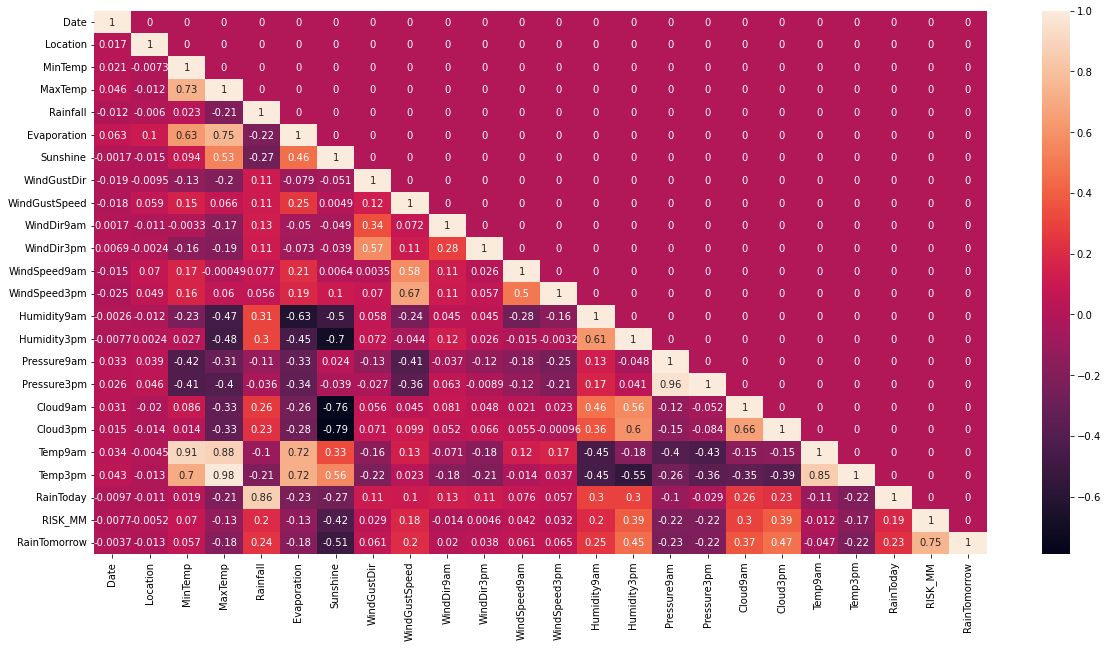

In [87]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(np.tril(raindata_filter.corr()),columns=raindata_filter.columns,index=raindata_filter.columns),annot=True)
fig.show()

In [88]:
pd.DataFrame(np.tril(raindata_filter.corr()),columns=raindata_filter.columns).head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.017106,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020826,-0.007266,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.045862,-0.011770,0.732048,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.011854,-0.006024,0.022873,-0.208629,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X = raindata_filter[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
y = raindata_filter['RainTomorrow']

In [90]:
raindata_filter.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [115]:
X_train.shape

(117639, 21)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [126]:
model=Sequential()
model.add(Dense(128, input_shape=(21,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3677/3677 [==============================] - 11s 3ms/step - loss: 0.4072 - accuracy: 0.8133
Epoch 2/10
3677/3677 [==============================] - 9s 3ms/step - loss: 0.3284 - accuracy: 0.8510
Epoch 3/10
3677/3677 [==============================] - 9s 2ms/step - loss: 0.2981 - accuracy: 0.8667
Epoch 4/10
3677/3677 [==============================] - 9s 2ms/step - loss: 0.2653 - accuracy: 0.8824
Epoch 5/10
3677/3677 [==============================] - 9s 3ms/step - loss: 0.2466 - accuracy: 0.8905
Epoch 6/10
3677/3677 [==============================] - 9s 3ms/step - loss: 0.2328 - accuracy: 0.8961
Epoch 7/10
3677/3677 [==============================] - 9s 3ms/step - loss: 0.2221 - accuracy: 0.9018
Epoch 8/10
3677/3677 [==============================] - 9s 2ms/step - loss: 0.2107 - accuracy: 0.9064
Epoch 9/10
3677/3677 [==============================] - 9s 2ms/step - loss: 0.2000 - accuracy: 0.9120
Epoch 10/10
3677/3677 [==============================] - 9s 2ms/step - loss: 0.19

In [124]:
model.evaluate(X_train, y_train)

3677/3677 [==============================] - 10s 3ms/step - loss: 0.0961 - accuracy: 0.9634


[0.0960611030459404, 0.9633709788322449]

In [125]:
model.evaluate(X_test, y_test)

1226/1226 [==============================] - 2s 2ms/step - loss: 0.2160 - accuracy: 0.9258


[0.21599237620830536, 0.9258409142494202]